In [1]:
import numpy as np
import matplotlib.pyplot as plt

In next few cells the data of tICA coordinate is loaded

In [2]:
#Load TICA trajectories

l = np.loadtxt('tica-data/tic_traj_0')
l = l.T
tIC_1 = l[0]
tIC_2 = l[1]
for i in range(1,38):
    l = np.loadtxt('tica-data/tic_traj_%d'%i)
    l = l.T
    tIC_1 = np.concatenate((tIC_1,l[0]))
    tIC_2 = np.concatenate((tIC_2,l[1]))

In [3]:
print(tIC_1.shape)
print(tIC_2.shape)

(31516,)
(31516,)


In [6]:
ll = 0
mm = 0
for i in range(38):
    l = np.loadtxt('tica-data/tic_traj_%d'%i)
    m = np.loadtxt('dihedral-data/phi_residue_2_traj_%d'%i)
    ll += len(l)
    mm += len(m)
    print(ll,mm)
#print(m)

747 747
1454 1454
3053 3053
3812 3812
4564 4564
5364 5364
6097 6097
6897 6897
7697 7697
8497 8497
9242 9242
10020 10020
10820 10820
11620 11620
12325 12325
13015 13015
13691 13691
14359 14359
15082 15082
16628 16628
17348 17348
18151 18151
18896 18896
19668 19668
20478 20478
21309 21309
22160 22160
22918 22918
23676 23676
24372 24372
25145 25145
25943 25943
26644 26644
27441 27441
28284 28284
29844 29844
30686 30686
31516 31516


In the next few cells dihedral angles are loaded and correlation is computed

In [7]:
#sin-cosine correlation of Phi angles


f1 = open('phi_tIC_1_sin_corr.dat','w')
f2 = open('phi_tIC_1_cos_corr.dat','w')
f3 = open('phi_tIC_2_sin_corr.dat','w')
f4 = open('phi_tIC_2_cos_corr.dat','w')
print('#Residue #correlation with tIC 1',file=f1)
print('#Residue #correlation with tIC 1',file=f2)
print('#Residue #correlation with tIC 2',file=f3)
print('#Residue #correlation with tIC 2',file=f4)
for i in range(2,3439):
    
    angles = np.loadtxt('dihedral-data/phi_residue_%d_traj_0'%i)
    
    for j in range(1,38):
        l = np.loadtxt('dihedral-data/phi_residue_%d_traj_%d'%(i,j))
        angles = np.concatenate((angles,l))
    
    cc_1 = np.corrcoef(tIC_1,np.sin(angles))
    cc_2 = np.corrcoef(tIC_1,np.cos(angles))
    cc_3 = np.corrcoef(tIC_2,np.sin(angles))
    cc_4 = np.corrcoef(tIC_2,np.cos(angles))
    
    
    
    print(i, cc_1[0,1],file=f1)
    print(i, cc_2[0,1],file=f2)
    print(i, cc_3[0,1],file=f3)
    print(i, cc_4[0,1],file=f4)

f1.close()
f2.close()
f3.close()
f4.close()

In [9]:
#sin-cosine correlation of psi angles


f1 = open('psi_tIC_1_sin_corr.dat','w')
f2 = open('psi_tIC_1_cos_corr.dat','w')
f3 = open('psi_tIC_2_sin_corr.dat','w')
f4 = open('psi_tIC_2_cos_corr.dat','w')
print('#Residue #correlation with tIC 1',file=f1)
print('#Residue #correlation with tIC 1',file=f2)
print('#Residue #correlation with tIC 2',file=f3)
print('#Residue #correlation with tIC 2',file=f4)
for i in range(1,3438):
    
    angles = np.loadtxt('dihedral-data/psi_residue_%d_traj_0'%i)
    
    for j in range(1,38):
        l = np.loadtxt('dihedral-data/psi_residue_%d_traj_%d'%(i,j))
        angles = np.concatenate((angles,l))
    
    cc_1 = np.corrcoef(tIC_1,np.sin(angles))
    cc_2 = np.corrcoef(tIC_1,np.cos(angles))
    cc_3 = np.corrcoef(tIC_2,np.sin(angles))
    cc_4 = np.corrcoef(tIC_2,np.cos(angles))
    
    
    
    print(i, cc_1[0,1],file=f1)
    print(i, cc_2[0,1],file=f2)
    print(i, cc_3[0,1],file=f3)
    print(i, cc_4[0,1],file=f4)

f1.close()
f2.close()
f3.close()
f4.close()

In [8]:
#sort sin-cosine the TICA correlations (Phi)

l = np.loadtxt('phi_tIC_1_sin_corr.dat')

sorted1 = l[np.argsort(l[:, 1])]

f1 = open('phi_sorted_tIC_1_sin_corr.dat','w')
print('#dihedral index   #correlation',file=f1)
for i in range(len(sorted1)):
    print(int(sorted1[i,0]),sorted1[i,1],file=f1)
f1.close()

l = np.loadtxt('phi_tIC_1_cos_corr.dat')

sorted1 = l[np.argsort(l[:, 1])]

f1 = open('phi_sorted_tIC_1_cos_corr.dat','w')
print('#dihedral index   #correlation',file=f1)
for i in range(len(sorted1)):
    print(int(sorted1[i,0]),sorted1[i,1],file=f1)
f1.close()

l = np.loadtxt('phi_tIC_2_sin_corr.dat')

sorted2 = l[np.argsort(l[:, 1])]

f1 = open('phi_sorted_tIC_2_sin_corr.dat','w')
print('#dihedral index   #correlation',file=f1)
for i in range(len(sorted2)):
    print(int(sorted2[i,0]),sorted2[i,1],file=f1)
f1.close()

l = np.loadtxt('phi_tIC_2_cos_corr.dat')

sorted2 = l[np.argsort(l[:, 1])]

f1 = open('phi_sorted_tIC_2_cos_corr.dat','w')
print('#dihedral index   #correlation',file=f1)
for i in range(len(sorted2)):
    print(int(sorted2[i,0]),sorted2[i,1],file=f1)
f1.close()

In [11]:
#sort sin-cosine the TICA correlations (psi)

l = np.loadtxt('psi_tIC_1_sin_corr.dat')

sorted1 = l[np.argsort(l[:, 1])]

f1 = open('psi_sorted_tIC_1_sin_corr.dat','w')
print('#dihedral index   #correlation',file=f1)
for i in range(len(sorted1)):
    print(int(sorted1[i,0]),sorted1[i,1],file=f1)
f1.close()

l = np.loadtxt('psi_tIC_1_cos_corr.dat')

sorted1 = l[np.argsort(l[:, 1])]

f1 = open('psi_sorted_tIC_1_cos_corr.dat','w')
print('#dihedral index   #correlation',file=f1)
for i in range(len(sorted1)):
    print(int(sorted1[i,0]),sorted1[i,1],file=f1)
f1.close()

l = np.loadtxt('psi_tIC_2_sin_corr.dat')

sorted2 = l[np.argsort(l[:, 1])]

f1 = open('psi_sorted_tIC_2_sin_corr.dat','w')
print('#dihedral index   #correlation',file=f1)
for i in range(len(sorted2)):
    print(int(sorted2[i,0]),sorted2[i,1],file=f1)
f1.close()

l = np.loadtxt('psi_tIC_2_cos_corr.dat')

sorted2 = l[np.argsort(l[:, 1])]

f1 = open('psi_sorted_tIC_2_cos_corr.dat','w')
print('#dihedral index   #correlation',file=f1)
for i in range(len(sorted2)):
    print(int(sorted2[i,0]),sorted2[i,1],file=f1)
f1.close()

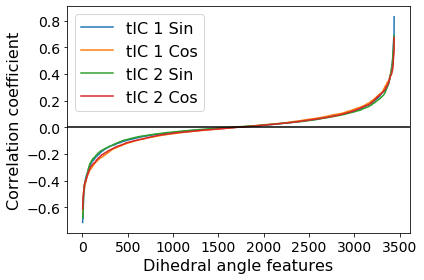

In [9]:
#spectra sin-cos
l1 = np.loadtxt('phi_tIC_1_sin_corr.dat')

l1.sort(axis=0)

l1 = l1.T

l2 = np.loadtxt('phi_tIC_1_cos_corr.dat')

l2.sort(axis=0)

l2 = l2.T

l3 = np.loadtxt('phi_tIC_2_sin_corr.dat')

l3.sort(axis=0)

l3 = l3.T

l4 = np.loadtxt('phi_tIC_2_cos_corr.dat')

l4.sort(axis=0)

l4 = l4.T



plt.plot(l1[0],l1[1],label='tIC 1 Sin')
plt.plot(l2[0],l2[1],label='tIC 1 Cos')
plt.plot(l3[0],l3[1],label='tIC 2 Sin')
plt.plot(l4[0],l4[1],label='tIC 2 Cos')
plt.xlabel('Dihedral angle features',fontsize=16)
plt.ylabel('Correlation coefficient',fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axhline(y=0,color='k')
plt.legend(fontsize=16)
plt.tight_layout()

#plt.show()
plt.savefig('phi_spectra.pdf')

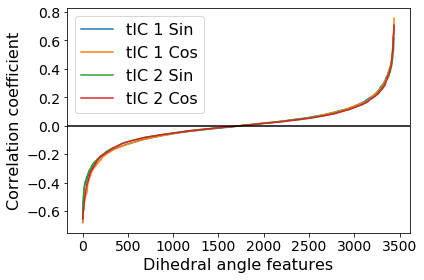

In [14]:
#spectra sin-cos
l1 = np.loadtxt('psi_tIC_1_sin_corr.dat')

l1.sort(axis=0)

l1 = l1.T

l2 = np.loadtxt('psi_tIC_1_cos_corr.dat')

l2.sort(axis=0)

l2 = l2.T

l3 = np.loadtxt('psi_tIC_2_sin_corr.dat')

l3.sort(axis=0)

l3 = l3.T

l4 = np.loadtxt('psi_tIC_2_cos_corr.dat')

l4.sort(axis=0)

l4 = l4.T



plt.plot(l1[0],l1[1],label='tIC 1 Sin')
plt.plot(l2[0],l2[1],label='tIC 1 Cos')
plt.plot(l3[0],l3[1],label='tIC 2 Sin')
plt.plot(l4[0],l4[1],label='tIC 2 Cos')
plt.xlabel('Dihedral angle features',fontsize=16)
plt.ylabel('Correlation coefficient',fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axhline(y=0,color='k')
plt.legend(fontsize=16)
plt.tight_layout()

#plt.show()
plt.savefig('psi_spectra.pdf')